In [4]:
path1 = 'D:\\MEGA BACKUP\\PC\\Nielit\\brain_tumor\\BRATS2018\\MICCAI_BraTS_2018_Data_Training\\HGG\\'
path2 = 'D:\\MEGA BACKUP\\PC\\Nielit\\brain_tumor\\BRATS2018\\MICCAI_BraTS_2018_Data_Training\\LGG\\'

In [1]:
cd D:\\MEGA BACKUP\\PC\\Nielit\\brain_tumor\\BRATS2018

D:\MEGA BACKUP\PC\Nielit\brain_tumor\BRATS2018


In [3]:
os.environ["CUDA_VISIBLE_DEVICES"]="-1"
import tensorflow as tf

In [2]:
import SimpleITK as sitk 
from tqdm import tqdm
import numpy as np
import os

In [5]:
def load_data(path):
    my_dir = sorted(os.listdir(path))
    data = []
    gt = []
    for p in tqdm(my_dir):
        data_list = sorted(os.listdir(path+p))
        img_itk = sitk.ReadImage(path + p + '/'+ data_list[0])
        flair = sitk.GetArrayFromImage(img_itk)
        img_itk = sitk.ReadImage(path + p + '/'+ data_list[1])
        seg =  sitk.GetArrayFromImage(img_itk)
        img_itk = sitk.ReadImage(path + p + '/'+ data_list[2])    
        t1 =  sitk.GetArrayFromImage(img_itk)
        img_itk = sitk.ReadImage(path + p + '/'+ data_list[3])
        t1ce =  sitk.GetArrayFromImage(img_itk)
        img_itk = sitk.ReadImage(path + p + '/'+ data_list[4])
        t2 =  sitk.GetArrayFromImage(img_itk)
        data.append([flair,t1,t1ce,t2])
        gt.append(seg)
    data = np.asarray(data,dtype=np.uint8)
    gt = np.asarray(gt,dtype=np.uint8)
    return data,gt

In [6]:
# for HGG
data1,gt1 = load_data(path1)   #dividing HGG in three parts i.e. 210 into three sets of 70 
# for LGG
data2,gt2 = load_data(path2)  #LGG having 75 patients 

100%|██████████████████████████████████████████████████████████████████████████████████| 75/75 [00:12<00:00,  6.03it/s]


In [7]:
 data2.shape,gt2.shape,data2.dtype,gt2.dtype

((75, 4, 155, 240, 240), (75, 155, 240, 240), dtype('uint8'), dtype('uint8'))

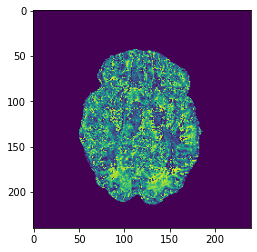

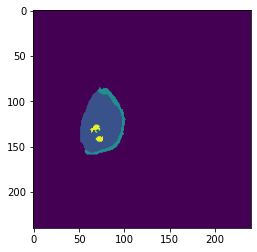

In [8]:
 import matplotlib.pyplot as plt
plt.imshow(data2[45,2,65,:,:])
plt.show()
plt.imshow(gt2[45,65,:,:])
plt.show()


In [8]:
np.save('data2.npy',data2)
np.save('gt2.npy',gt2)

In [9]:
import numpy as np
from tqdm import tqdm

In [10]:
data = np.load('D:\\MEGA BACKUP\\PC\\Nielit\\brain_tumor\\BRATS2018\\data2.npy')
gt = np.load('D:\\MEGA BACKUP\\PC\\Nielit\\brain_tumor\\BRATS2018\\gt2.npy')

In [11]:
data = np.transpose(data,(0,2,3,4,1))

In [12]:
data.shape,gt.shape,data.dtype,gt.dtype

((75, 155, 240, 240, 4), (75, 155, 240, 240), dtype('uint8'), dtype('uint8'))

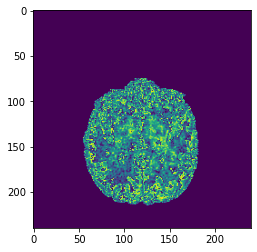

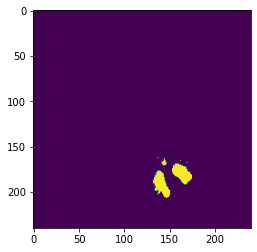

In [13]:
import matplotlib.pyplot as plt
plt.imshow(data[50,70,:,:,2])
plt.show()
plt.imshow(gt[50,70,:,:])
plt.show()

In [14]:
data.shape,gt.shape

((75, 155, 240, 240, 4), (75, 155, 240, 240))

In [15]:
'''Taking Only from 30th slice till 120th slice for creating the data and also cropping the images to discard useless background 
So, from 240x240x4 each image now becomes of shape 192x192x4 taking all 4 modalities''' 

'Taking Only from 30th slice till 120th slice for creating the data and also cropping the images to discard useless background \nSo, from 240x240x4 each image now becomes of shape 192x192x4 taking all 4 modalities'

In [20]:
data = data[:,30:120,30:222,30:222,:].reshape([-1,192,192,1])
gt = gt[:,30:120,30:222,30:222].reshape([-1,192,192,1])

IndexError: too many indices for array

In [17]:
data.shape,gt.shape

((27000, 192, 192, 1), (6750, 192, 192, 1))

In [18]:
gt[np.where(gt==4)]=3   #converting ground truth value of 4 to 3 to do one hot encoding (Consider value 3 in results in output as class 4)

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(data, gt, test_size=0.20, random_state=42)
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.25,random_state=42)

In [20]:
from keras.utils import to_categorical,normalize
Y_train = to_categorical(Y_train)
Y_val = to_categorical(Y_val)
X_train = (X_train-np.mean(X_train))/np.max(X_train)
X_test = (X_test-np.mean(X_test))/np.max(X_test)
X_val = (X_val-np.mean(X_val))/np.max(X_val)

Using TensorFlow backend.


In [21]:
X_train.shape,Y_train.shape, X_val.shape, Y_val.shape, X_test.shape, Y_test.shape

((4050, 192, 192, 4),
 (4050, 192, 192, 4),
 (1350, 192, 192, 4),
 (1350, 192, 192, 4),
 (1350, 192, 192, 4),
 (1350, 192, 192, 1))

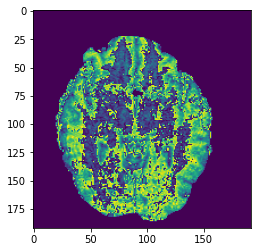

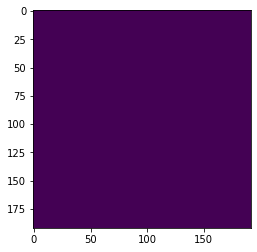

In [22]:
plt.imshow(X_train[1,:,:,1])
plt.show()
plt.imshow(Y_train[1,:,:,3])
plt.show()

In [23]:
#Saving the data one by one total set 4
np.save('D:\\MEGA BACKUP\\PC\\Nielit\\brain_tumor\\BRATS2018\\X_train4.npy',X_train)
np.save('D:\\MEGA BACKUP\\PC\\Nielit\\brain_tumor\\BRATS2018\\Y_train4.npy',Y_train)
np.save('D:\\MEGA BACKUP\\PC\\Nielit\\brain_tumor\\BRATS2018\\X_val4.npy',X_val)
np.save('D:\\MEGA BACKUP\\PC\\Nielit\\brain_tumor\\BRATS2018\\Y_val4.npy',Y_val)
np.save('D:\\MEGA BACKUP\\PC\\Nielit\\brain_tumor\\BRATS2018\\X_test4.npy',X_test)
np.save('D:\\MEGA BACKUP\\PC\\Nielit\\brain_tumor\\BRATS2018\\Y_test4.npy',Y_test)

In [23]:
'''Using 4 sets made by pre-processing one by one each having training set of 3780, validaiton of 1260 and test data of 1260 slices of mri scans'''

'Using 4 sets made by pre-processing one by one each having training set of 3780, validaiton of 1260 and test data of 1260 slices of mri scans'

In [24]:
import numpy as np

In [25]:
# X_train = np.load('./Training Data/X_train1.npy')
# Y_train = np.load('./Training Data/Y_train1.npy')
# X_train = np.load('./Training Data/X_train2.npy')
# Y_train = np.load('./Training Data/Y_train2.npy')
# X_train = np.load('./Training Data/X_train3.npy')
# Y_train = np.load('./Training Data/Y_train3.npy')
X_train = np.load('./X_train4.npy')
Y_train = np.load('./Y_train4.npy')

In [26]:
# X_val = np.load('./Validation Data/X_val1.npy')
# Y_val = np.load('./Validation Data/Y_val1.npy')
# X_val = np.load('./Validation Data/X_val2.npy')
# Y_val = np.load('./Validation Data/Y_val2.npy')
# X_val = np.load('./Validation Data/X_val3.npy')
# Y_val = np.load('./Validation Data/Y_val3.npy')
X_val = np.load('./X_val4.npy')
Y_val = np.load('./Y_val4.npy')

In [27]:
X_train.shape,Y_train.shape,X_val.shape,Y_val.shape

((4050, 192, 192, 4),
 (4050, 192, 192, 4),
 (1350, 192, 192, 4),
 (1350, 192, 192, 4))

In [28]:
from keras.models import Model
from keras.layers import MaxPooling2D,Conv2D,Dense,BatchNormalization,concatenate,Input,Dropout,Maximum,Activation,Dense,Flatten,UpSampling2D,Conv2DTranspose
from keras.optimizers import SGD,Adam,RMSprop
import keras.callbacks as callbacks
import keras.initializers as initializers
from keras.callbacks import Callback
from keras import regularizers

In [49]:
    input_ = Input(shape=(192,192,4),name='input') 
    conv1 = Conv2D(64, (3, 3), activation='relu', padding='same') (input_)
    batch1 = BatchNormalization(axis=1)(conv1)
    conv1 = Conv2D(64, (3, 3), activation='relu', padding='same') (batch1)
    batch1 = BatchNormalization(axis=1)(conv1)
    pool1 = MaxPooling2D((2, 2)) (batch1)
    
    conv2 = Conv2D(128, (3, 3), activation='relu', padding='same') (pool1)
    batch2 = BatchNormalization(axis=1)(conv2)
    conv2 = Conv2D(128, (3, 3), activation='relu', padding='same') (batch2)
    batch2 = BatchNormalization(axis=1)(conv2)
    pool2 = MaxPooling2D((2, 2)) (batch2)
    
    conv3 = Conv2D(256, (3, 3), activation='relu', padding='same') (pool2)
    batch3 = BatchNormalization(axis=1)(conv3)
    conv3 = Conv2D(256, (3, 3), activation='relu', padding='same') (batch3)
    batch3 = BatchNormalization(axis=1)(conv3)
    pool3 = MaxPooling2D((2, 2)) (batch3)
    
    #conv4 = Conv2D(256, (3, 3), activation='relu', padding='same') (pool3)
    #conv4 = Conv2D(256, (3, 3), activation='relu', padding='same') (conv4)
    #pool4 = MaxPooling2D(pool_size=(2, 2)) (conv4)
    
    conv5 = Conv2D(512, (3, 3), activation='relu', padding='same') (pool3)
    batch5 = BatchNormalization(axis=1)(conv5)
    conv5 = Conv2D(512, (3, 3), activation='relu', padding='same') (batch5)
    batch5 = BatchNormalization(axis=1)(conv5)
    
    #up6 = Conv2DTranspose(256, (2, 2), strides=(2, 2), padding='same') (conv5)
    #up6 = concatenate([up6, conv4])
   # conv6 = Conv2D(256, (3, 3), activation='relu', padding='same') (up6)
    #conv6 = Conv2D(256, (3, 3), activation='relu', padding='same') (conv6)
    
    up7 = Conv2DTranspose(256, (2, 2), strides=(2, 2), padding='same') (batch5)
    up7 = concatenate([up7, conv3], axis=1)
    conv7 = Conv2D(256, (3, 3), activation='relu', padding='same') (up7)
    batch7 = BatchNormalization(axis=1)(conv7)
    conv7 = Conv2D(256, (3, 3), activation='relu', padding='same') (batch7)
    batch7 = BatchNormalization(axis=1)(conv7)
    
    up8 = Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same') (batch7)
    up8 = concatenate([up8, conv2], axis=1)
    conv8 = Conv2D(128, (3, 3), activation='relu', padding='same') (up8)
    batch8 = BatchNormalization(axis=1)(conv8)
    conv8 = Conv2D(128, (3, 3), activation='relu', padding='same') (batch8)
    batch8 = BatchNormalization(axis=1)(conv8)
    
    up9 = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same') (batch8)
    up9 = concatenate([up9, conv1], axis=1)
    conv9 = Conv2D(64, (3, 3), activation='relu', padding='same') (up9)
    batch9 = BatchNormalization(axis=1)(conv9)
    conv9 = Conv2D(64, (3, 3), activation='relu', padding='same') (batch9)
    batch9 = BatchNormalization(axis=1)(conv9)

    conv10 = Conv2D(4,1, activation='sigmoid')(batch9)

    model = Model(inputs=[input_], outputs=[conv10])
    

    

In [50]:
model.summary()

Model: "functional_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input (InputLayer)              [(None, 192, 192, 4) 0                                            
__________________________________________________________________________________________________
conv2d_46 (Conv2D)              (None, 192, 192, 64) 2368        input[0][0]                      
__________________________________________________________________________________________________
batch_normalization_36 (BatchNo (None, 192, 192, 64) 768         conv2d_46[0][0]                  
__________________________________________________________________________________________________
conv2d_47 (Conv2D)              (None, 192, 192, 64) 36928       batch_normalization_36[0][0]     
_______________________________________________________________________________________

In [29]:
############################################ U-net #############################################

############ Encoder #############
input_ = Input(shape=(192,192,4),name='input')                                              

block1_conv1 = Conv2D(64,3,padding='same',activation='relu',name='block1_conv1')(input_)
block1_conv2 = Conv2D(64,3,padding='same',activation='relu',name='block1_conv2')(block1_conv1)
block1_norm = BatchNormalization(name='block1_batch_norm')(block1_conv2)
block1_pool = MaxPooling2D(name='block1_pool')(block1_norm)

block2_conv1 = Conv2D(128,3,padding='same',activation='relu',name='block2_conv1')(block1_pool)
block2_conv2 = Conv2D(128,3,padding='same',activation='relu',name='block2_conv2')(block2_conv1)
block2_norm = BatchNormalization(name='block2_batch_norm')(block2_conv2)
block2_pool = MaxPooling2D(name='block2_pool')(block2_norm)

encoder_dropout_1 = Dropout(0.2,name='encoder_dropout_1')(block2_pool)

block3_conv1 = Conv2D(256,3,padding='same',activation='relu',name='block3_conv1')(encoder_dropout_1)
block3_conv2 = Conv2D(256,3,padding='same',activation='relu',name='block3_conv2')(block3_conv1)
block3_norm = BatchNormalization(name='block3_batch_norm')(block3_conv2)
block3_pool = MaxPooling2D(name='block3_pool')(block3_norm)

block4_conv1 = Conv2D(512,3,padding='same',activation='relu',name='block4_conv1')(block3_pool)
block4_conv2 = Conv2D(512,3,padding='same',activation='relu',name='block4_conv2')(block4_conv1)
block4_norm = BatchNormalization(name='block4_batch_norm')(block4_conv2)
block4_pool = MaxPooling2D(name='block4_pool')(block4_norm)
################### Encoder end ######################

block5_conv1 = Conv2D(1024,3,padding='same',activation='relu',name='block5_conv1')(block4_pool)
# encoder_dropout_2 = Dropout(0.2,name='encoder_dropout_2')(block5_conv1)

########### Decoder ################

up_pool1 = Conv2DTranspose(1024,3,strides = (2, 2),padding='same',activation='relu',name='up_pool1')(block5_conv1)
merged_block1 = concatenate([block4_norm,up_pool1],name='merged_block1')
decod_block1_conv1 = Conv2D(512,3, padding = 'same', activation='relu',name='decod_block1_conv1')(merged_block1)

up_pool2 = Conv2DTranspose(512,3,strides = (2, 2),padding='same',activation='relu',name='up_pool2')(decod_block1_conv1)
merged_block2 = concatenate([block3_norm,up_pool2],name='merged_block2')
decod_block2_conv1 = Conv2D(256,3,padding = 'same',activation='relu',name='decod_block2_conv1')(merged_block2)

decoder_dropout_1 = Dropout(0.2,name='decoder_dropout_1')(decod_block2_conv1)

up_pool3 = Conv2DTranspose(256,3,strides = (2, 2),padding='same',activation='relu',name='up_pool3')(decoder_dropout_1)
merged_block3 = concatenate([block2_norm,up_pool3],name='merged_block3')
decod_block3_conv1 = Conv2D(128,3,padding = 'same',activation='relu',name='decod_block3_conv1')(merged_block3)

up_pool4 = Conv2DTranspose(128,3,strides = (2, 2),padding='same',activation='relu',name='up_pool4')(decod_block3_conv1)
merged_block4 = concatenate([block1_norm,up_pool4],name='merged_block4')
decod_block4_conv1 = Conv2D(64,3,padding = 'same',activation='relu',name='decod_block4_conv1')(merged_block4)
############ Decoder End ######################################

decoder_dropout_2 = Dropout(0.2,name='decoder_dropout_2')(decod_block4_conv1)

pre_output = Conv2D(64,1,padding = 'same',activation='relu',name='pre_output')(decod_block4_conv1)

output = Conv2D(4,1,padding='same',activation='softmax',name='output')(pre_output)

model = Model(inputs = input_, outputs = output)
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input (InputLayer)              [(None, 192, 192, 4) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 192, 192, 64) 2368        input[0][0]                      
__________________________________________________________________________________________________
block1_conv2 (Conv2D)           (None, 192, 192, 64) 36928       block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_batch_norm (BatchNormali (None, 192, 192, 64) 256         block1_conv2[0][0]               
_______________________________________________________________________________________

In [34]:

from keras.utils import  plot_model
plot_model(model,to_file='unet.png',show_shapes=True)

('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')


In [51]:
from keras import backend as K
def dice_coef(y_true, y_pred, epsilon=1e-6):
    intersection = K.sum(K.abs(y_true * y_pred), axis=-1)
    return (2. * intersection) / (K.sum(K.square(y_true),axis=-1) + K.sum(K.square(y_pred),axis=-1) + epsilon)

def dice_coef_loss(y_true, y_pred):
    return 1-dice_coef(y_true, y_pred)

In [ ]:
model.compile(optimizer=Adam(lr=1e-5),loss=dice_coef_loss,metrics=[dice_coef])
model.load_weights('D:\\MEGA BACKUP\\PC\\Nielit\\brain_tumor\\BRATS2018\\weights\\weightsETbest.hdf5')
training_log = callbacks.TensorBoard(log_dir='./Model_logs')

In [32]:
history = model.fit(X_train,Y_train,validation_data=(X_val,Y_val),batch_size=32,epochs=5,callbacks=[training_log,],shuffle=True)

Epoch 1/5
  1/127 [..............................] - ETA: 1s - loss: 0.0753 - dice_coef: 0.9247WARNING:tensorflow:From C:\Users\Rishi\anaconda3\envs\Altair\lib\site-packages\tensorflow\python\ops\summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
127/127 [==============================] - 3582s 28s/step - loss: 0.0333 - dice_coef: 0.9667 - val_loss: 0.0316 - val_dice_coef: 0.9684
Epoch 2/5
127/127 [==============================] - 3581s 28s/step - loss: 0.0327 - dice_coef: 0.9673 - val_loss: 0.0316 - val_dice_coef: 0.9684
Epoch 3/5
127/127 [==============================] - 3580s 28s/step - loss: 0.0327 - dice_coef: 0.9673 - val_loss: 0.0316 - val_dice_coef: 0.9684
Epoch 4/5
127/127 [==============================] - 3582s 28s/step - loss: 0.0327 - dice_coef: 0.9673 - val_loss: 0.0316 - val_dice_coef: 0.9684
Epoch 5/5
127/127 [==================

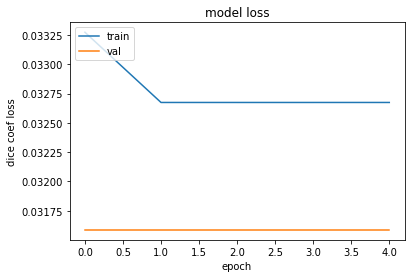

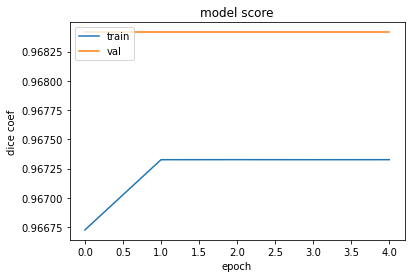

In [33]:
# summarize history for loss
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('dice coef loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
plt.plot(history.history['dice_coef'])
plt.plot(history.history['val_dice_coef'])
plt.title('model score')
plt.ylabel('dice coef')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [35]:
score = model.evaluate(X_train,Y_train, verbose=0)
print(score)

[0.03267418220639229, 0.9673259854316711]
